In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**1) Import required libraries and read the dataset.**

In [2]:
df=pd.read_csv('Apps_data+(1).csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df=df.rename(columns={'App':'Application','Category':'Cat'})
df

,Application,Cat,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

**3)  Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.**

In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [8]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
df.isnull().sum()*100/len(df)

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**observation** All the columns except 'App','Genres','Last Updated', 'Current Ver','Android Ver'have to be worked upon
in order to build a model for predictive analysis. Since the columns 'App','Genres','Last Updated', 'Current Ver','Android Ver' are redundant for our analysis.

**4) Check if there are any duplicate records in the dataset? if any drop them**

In [11]:
df[df.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [12]:
df.drop_duplicates(keep=False,inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**5) Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them**

In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
df=df[df['Category']!='1.9']
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
df.shape

(9947, 13)

**6)  Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**


In [16]:
df['Rating'].isnull().sum()

1457

In [17]:
df['Rating'].skew()

-1.8010111531092705

In [18]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [19]:
df['Rating'].isnull().sum()

0

In [20]:
df['Rating_category']=df['Rating'].apply(lambda x:'High' if x >3.5 else 'Low')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


**7) Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

In [21]:
df['Rating_category'].value_counts()

Rating_category
High    9082
Low      865
Name: count, dtype: int64

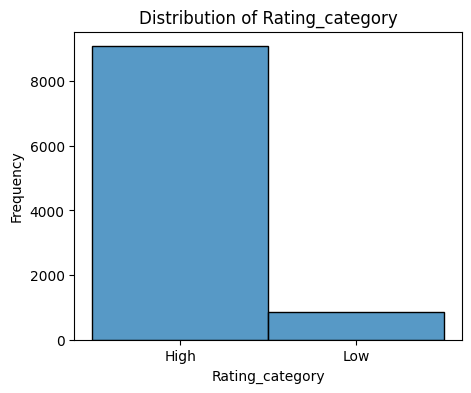

In [22]:
plt.figure(figsize=(5,4))
sns.histplot(df,x='Rating_category',bins=5,palette='viridis',kde=False)
plt.title('Distribution of Rating_category')
plt.xlabel('Rating_category')
plt.ylabel('Frequency')
plt.show()


**observation**: The distribution is imbalanced, with a much higher count for the 'High' category compared to the 'Low' category.

**8)  Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)**

In [23]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')
df['Reviews'].dtype

dtype('int64')

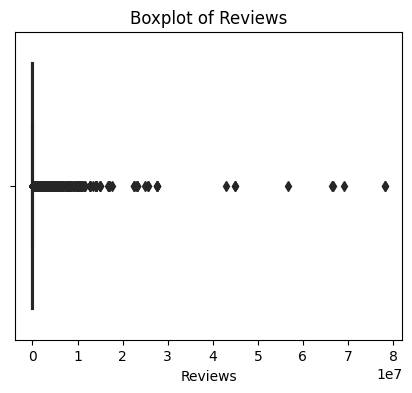

In [24]:
plt.figure(figsize=(5,4))
sns.boxplot(df,x='Reviews',color='purple')
plt.title('Boxplot of Reviews')
plt.show()

In [25]:
df['Reviews']=np.log1p(df['Reviews'])

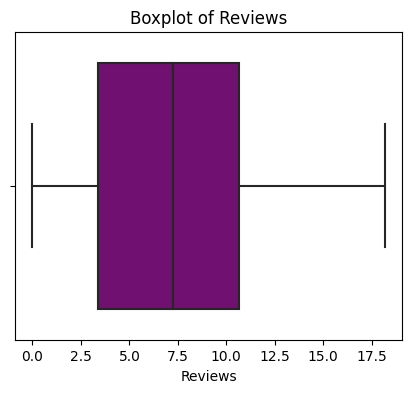

In [26]:
plt.figure(figsize=(5,4))
sns.boxplot(df,x='Reviews',color='purple')
plt.title('Boxplot of Reviews')
plt.show()

**9)The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')**

In [27]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
       '1.4M

In [28]:
df['Size'].value_counts()['Varies with device']

1391

In [29]:
df = df[df['Size'] != 'Varies with device']
df['Size'] = df['Size'].str.replace('k', '*1000').str.replace('M', '*100000')
df['Size'] = df['Size'].apply(eval)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,1900000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,1400000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,870000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,2500000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,280000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [30]:
df.shape
df.dropna()

(8556, 14)

**10) Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [31]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

In [32]:
df['Installs']=df['Installs'].str.replace(',','').str.replace('+','').astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10835          10
10836        5000
10837         100
10838        1000
10840    10000000
Name: Installs, Length: 8556, dtype: int32

**11) Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [33]:
df['Price'].unique()

array(['0', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99', '$4.99',
       '$1.99', '$9.99', '$0.99', '$1.00', '$3.49', '$10.99', '$7.49',
       '$1.50', '$14.99', '$15.99', '$74.99', '$39.99', '$29.99', '$4.49',
       '$1.70', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$2.49', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61',
       '$19.99', '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99',
       '$379.99', '$37.99', '$18.99', '$389.99', '$19.90', '$8.49',
       '$1.75', '$14.00', '$4.85', '$46.99', '$109.99', '$154.99',
       '$3.08', '$2.59', '$4.80', '$8.99', '$1.96', '$19.40', '$15.46',
       '$10.00', '$5.49', '$3.04', '$12.99', '$4.29', '$2.60', '$3.28',
       '$4.60', '$28.99', '$2.90', '$1.97', '$24.99', '$200.00', '$89.99',
       '$2.56', '$30.99', '$3.61', '$394.99', '$1.26', '$16.99', '$1.20',
       '$1.04'], dtype=object)

In [34]:
df['Price']=df['Price'].str.replace('$','').astype(float)
df['Price'].unique()

array([  0.  ,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,   4.99,
         1.99,   9.99,   0.99,   1.  ,   3.49,  10.99,   7.49,   1.5 ,
        14.99,  15.99,  74.99,  39.99,  29.99,   4.49,   1.7 ,   2.  ,
         3.88,  25.99, 399.99,  17.99, 400.  ,   2.49,   3.02,   1.76,
         4.84,   4.77,   1.61,  19.99,   1.59,   6.49,   1.29,   5.  ,
        13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,   8.49,
         1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,   2.59,
         4.8 ,   8.99,   1.96,  19.4 ,  15.46,  10.  ,   5.49,   3.04,
        12.99,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97,
        24.99, 200.  ,  89.99,   2.56,  30.99,   3.61, 394.99,   1.26,
        16.99,   1.2 ,   1.04])

**12) Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [35]:
df_copy=df.copy()

In [36]:
df.drop(['Rating','Genres','Last Updated','Current Ver','Android Ver','App'],axis=1,inplace=True)
df.head()


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,1900000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,1400000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379520,870000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281389,2500000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.875232,280000.0,100000,Free,0.0,Everyone,High


**13) Encode the categorical columns.**

In [37]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=LabelEncoder().fit_transform(df[col])
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.075174,1900000.0,10000,0,0.0,1,0
1,0,6.875232,1400000.0,500000,0,0.0,1,0
2,0,11.379520,870000.0,5000000,0,0.0,1,0
3,0,12.281389,2500000.0,50000000,0,0.0,4,0
4,0,6.875232,280000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10835,4,0.000000,960000.0,10,0,0.0,1,0
10836,11,3.663562,5300000.0,5000,0,0.0,1,0
10837,11,1.609438,360000.0,100,0,0.0,1,0
10838,20,1.386294,950000.0,1000,0,0.0,1,0


**14) Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [43]:
X=df.drop('Rating_category',axis=1)
y=df[['Rating_category']]

**15) Split the dataset into train and test.**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating
8835,14,9.972267,8400000.0,1000000,0,0.0,1
5336,11,5.298317,266000.0,10000,0,0.0,1
10105,10,0.000000,2400000.0,10,0,0.0,1
5905,5,4.844187,470000.0,5000,0,0.0,4
8669,11,6.915723,520000.0,100000,0,0.0,1


**16) Standardize the data, so that the values are within a particular range**

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [51]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
lr.score(X_train,y_train)

0.013747915960264923

In [53]:
lr.score(X_test,y_test)

0.012709838252992656